In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [3]:
img = cv2.imread('him.jpg')
gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Ищем лица
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

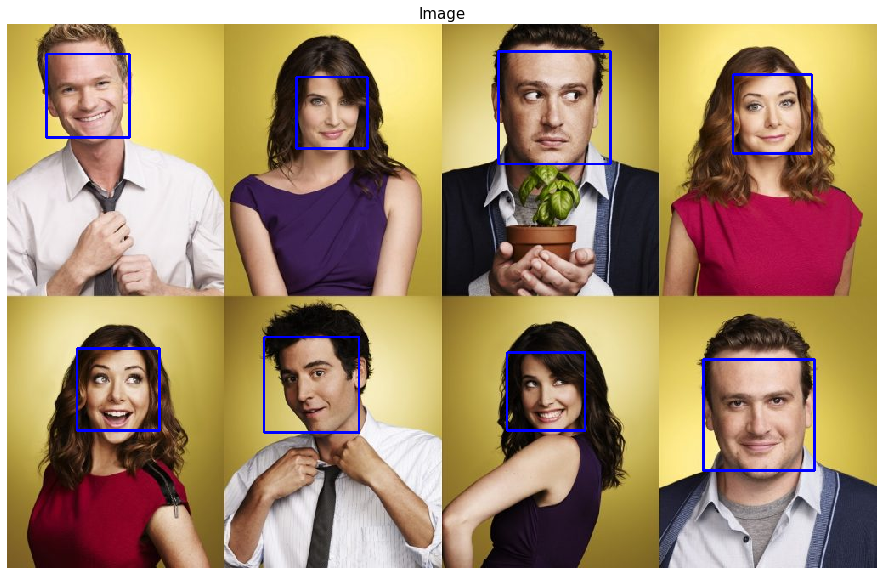

In [4]:
plt.rcParams['figure.figsize'] = 18,10
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image', fontsize=15)
plt.axis('off');

1772


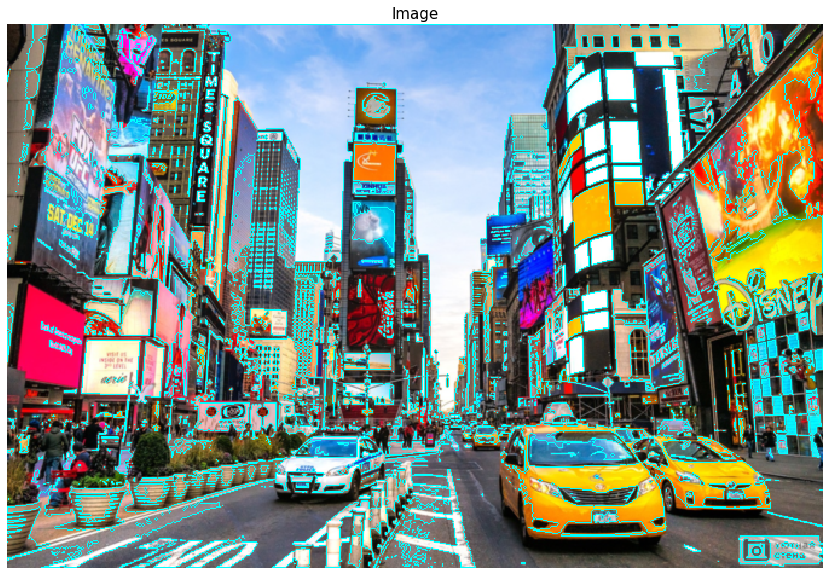

In [5]:
img = cv2.pyrDown(cv2.imread('street.jpg', cv2.IMREAD_UNCHANGED))

# threshold image
ret, threshed_img = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
                127, 255, cv2.THRESH_BINARY)
# find contours and get the external one

contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


# a minEnclosingCircle in blue
for c in contours:

    # get the min area rect
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    # convert all coordinates floating point values to int
    box = np.int0(box)

print(len(contours))
cv2.drawContours(img, contours, -1, (255, 255, 0), 1)



plt.rcParams['figure.figsize'] = 18,10
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image', fontsize=15)
plt.axis('off');